# CNN 이진분류 (컬러이미지)
- 개와고양이 데이터셋

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
time: 302 µs (started: 2024-07-01 06:30:57 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 7.69 s (started: 2024-07-01 06:30:57 +00:00)


## 1.데이터 준비

In [3]:
!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

Downloading...
From (original): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR
From (redirected): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR&confirm=t&uuid=d70741a8-30d1-4b21-a969-db69abf99af5
To: /content/cats_and_dogs.zip
100% 68.6M/68.6M [00:00<00:00, 198MB/s]
time: 2.42 s (started: 2024-07-01 06:31:04 +00:00)


In [4]:
!unzip /content/cats_and_dogs.zip

Archive:  /content/cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/test/
   creating: cats_and_dogs/test/cats/
  inflating: cats_and_dogs/test/cats/cat.2300.jpg  
  inflating: cats_and_dogs/test/cats/cat.2301.jpg  
  inflating: cats_and_dogs/test/cats/cat.2302.jpg  
  inflating: cats_and_dogs/test/cats/cat.2303.jpg  
  inflating: cats_and_dogs/test/cats/cat.2304.jpg  
  inflating: cats_and_dogs/test/cats/cat.2305.jpg  
  inflating: cats_and_dogs/test/cats/cat.2306.jpg  
  inflating: cats_and_dogs/test/cats/cat.2307.jpg  
  inflating: cats_and_dogs/test/cats/cat.2308.jpg  
  inflating: cats_and_dogs/test/cats/cat.2309.jpg  
  inflating: cats_and_dogs/test/cats/cat.2310.jpg  
  inflating: cats_and_dogs/test/cats/cat.2311.jpg  
  inflating: cats_and_dogs/test/cats/cat.2312.jpg  
  inflating: cats_and_dogs/test/cats/cat.2313.jpg  
  inflating: cats_and_dogs/test/cats/cat.2314.jpg  
  inflating: cats_and_dogs/test/cats/cat.2315.jpg  
  inflating: cats_and_dogs/test/

In [5]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 604 µs (started: 2024-07-01 06:31:08 +00:00)


### 데이터 로딩

In [6]:
class_name = ['cats', 'dogs']

time: 344 µs (started: 2024-07-01 06:31:08 +00:00)


In [7]:
import os

train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')

time: 4.01 ms (started: 2024-07-01 06:31:08 +00:00)


In [8]:
import PIL

X_train = []
y_train = []

for fname in train_cats_fnames:
    image = PIL.Image.open(train_dir + '/cats/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

len(X_train), len(y_train)

(1300, 1300)

time: 10 s (started: 2024-07-01 06:31:08 +00:00)


In [9]:
for fname in train_dogs_fnames:
    image = PIL.Image.open(train_dir + '/dogs/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

len(X_train), len(y_train)

(2600, 2600)

time: 10.8 s (started: 2024-07-01 06:31:19 +00:00)


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 224, 224, 3) (2600,)
time: 413 ms (started: 2024-07-01 06:31:29 +00:00)


## 2.학습, 검증 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(2080, 224, 224, 3) (520, 224, 224, 3)
(2080,) (520,)
time: 885 ms (started: 2024-07-01 06:31:30 +00:00)


In [12]:
X_train.shape

(2080, 224, 224, 3)

time: 7.54 ms (started: 2024-07-01 06:31:31 +00:00)


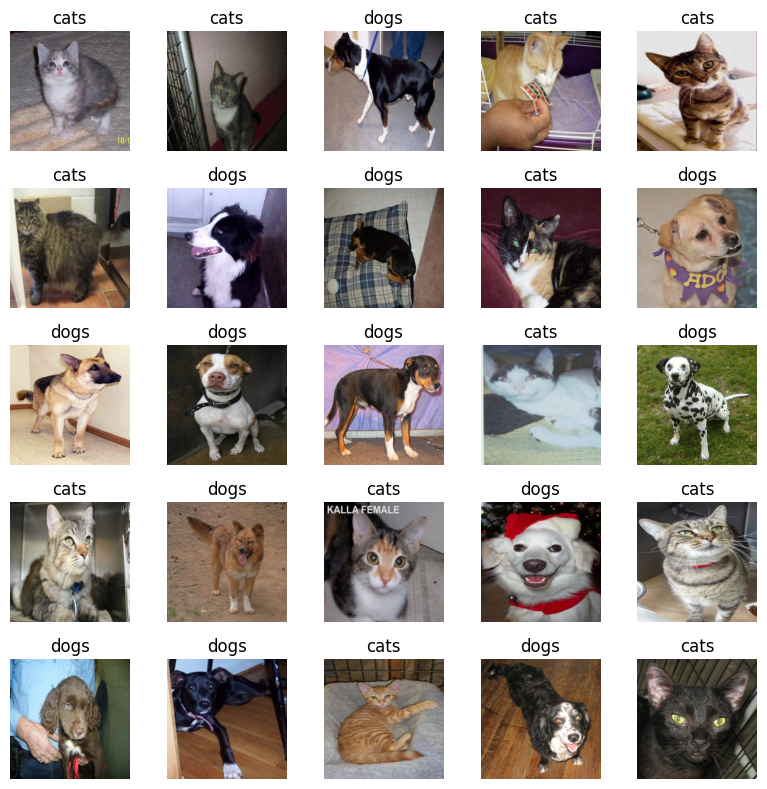

In [13]:
# np.random.seed(42)
sample = np.random.randint(2080, size=25)

fig = plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
fig.tight_layout()
plt.show()

## 3.전처리

In [14]:
X_train_s = X_train.astype('float')/255.
X_val_s = X_val.astype('float')/255.

time: 3.3 s (started: 2024-07-01 06:31:31 +00:00)
time: 1.15 s (started: 2024-07-01 06:31:34 +00:00)


## 4.모델

In [15]:
X_train_s.shape

(2080, 224, 224, 3)

time: 3.46 ms (started: 2024-07-01 06:31:35 +00:00)


In [16]:
from keras.applications import VGG16

base_model = VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False
base_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [21]:
from keras import layers

model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [22]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 27.2 ms (started: 2024-07-01 06:32:42 +00:00)


In [23]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val_s, y_val))

Epoch 1/10
65/65 [==============================] - 14s 194ms/step - loss: 1.0795 - accuracy: 0.6649 - val_loss: 0.2511 - val_accuracy: 0.9019
Epoch 2/10
65/65 [==============================] - 11s 163ms/step - loss: 0.2681 - accuracy: 0.8904 - val_loss: 0.2099 - val_accuracy: 0.9212
Epoch 3/10
65/65 [==============================] - 11s 173ms/step - loss: 0.1914 - accuracy: 0.9250 - val_loss: 0.1920 - val_accuracy: 0.9365
Epoch 4/10
65/65 [==============================] - 11s 170ms/step - loss: 0.1522 - accuracy: 0.9394 - val_loss: 0.2257 - val_accuracy: 0.9269
Epoch 5/10
65/65 [==============================] - 12s 179ms/step - loss: 0.0919 - accuracy: 0.9630 - val_loss: 0.2737 - val_accuracy: 0.9327
Epoch 6/10
65/65 [==============================] - 11s 176ms/step - loss: 0.0563 - accuracy: 0.9779 - val_loss: 0.4450 - val_accuracy: 0.8865
Epoch 7/10
65/65 [==============================] - 11s 174ms/step - loss: 0.0849 - accuracy: 0.9635 - val_loss: 0.2957 - val_accuracy: 0.9442

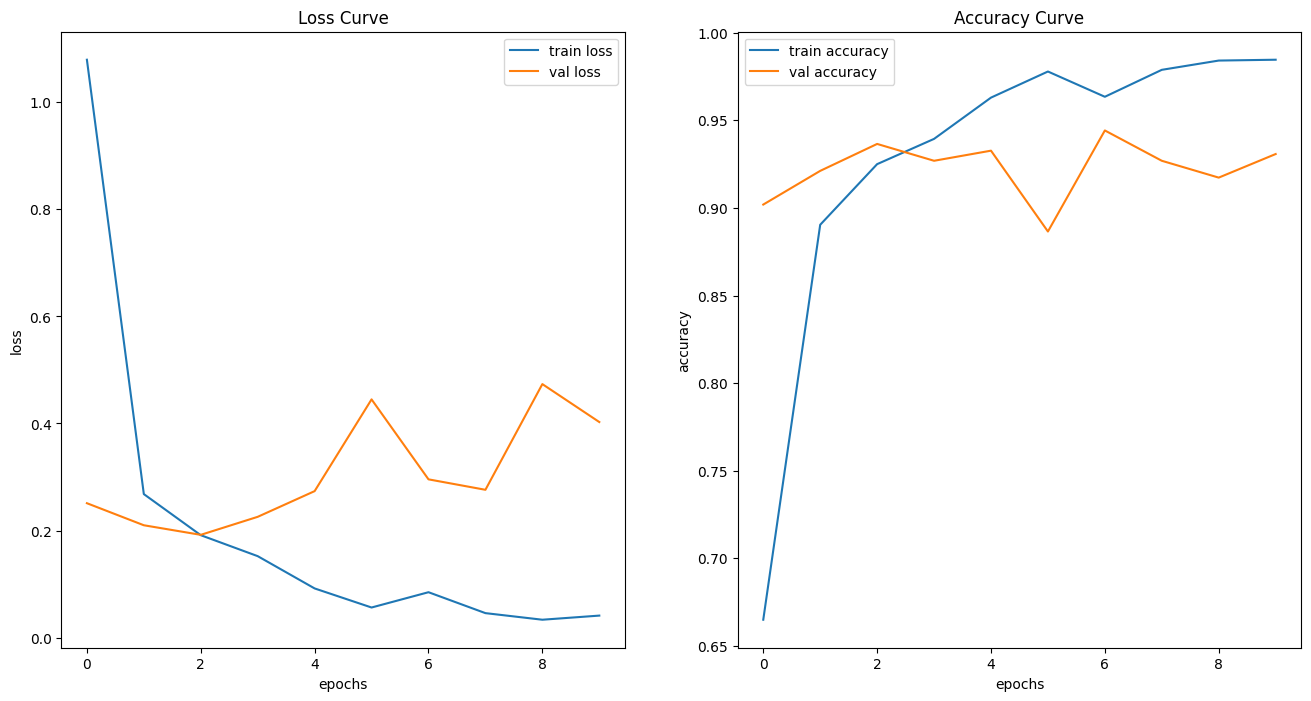

time: 1 s (started: 2024-07-01 06:35:16 +00:00)


In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

## 평가

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test, y_pred)

In [28]:
!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5

Downloading...
From (original): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5
From (redirected): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5&confirm=t&uuid=cc32c0e7-9986-4830-949d-733e8265af7a
To: /content/PlantVillage.zip
100% 345M/345M [00:10<00:00, 33.3MB/s]
time: 12.3 s (started: 2024-07-01 06:46:58 +00:00)


In [29]:
!unzip /content/PlantVillage.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff0f33d2-9e9f-4b74-861d-a7e0fdf8d248___Com.G_SpM_FL 8511.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff146f2c-dbb7-4da0-aa98-a36351435489___Com.G_SpM_FL 9654.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff20d775-59a6-437c-9039-f72d07aa4484___Com.G_SpM_FL 8524.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff6346ca-227b-4cb4-a350-0941048744fa___Com.G_SpM_FL 9338.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff9a52b5-b200-4f23-9e0d-629b1a0e89db___Com.G_SpM_FL 8634.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ffb00771-1462-4c9d-962b-7aaa7e8d5a51___Com.G_SpM_FL 1411.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ffb50767-1893-4379-ba42-8af6d8030057___Com.G_SpM_FL 8854.JPG  
  inflating: PlantVillage/Tomato_